In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

w = [-9.  7.], b = 8


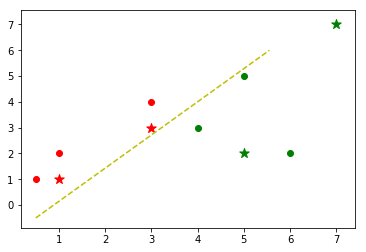

In [85]:
# create our dataset
data = {1:np.array([[1,2],[0.5,1],[3,4]]),0:np.array([[5,5],[4,3],[6,2]])}

def init_weight_bais():
    w = np.array([1,1])
    b = 0
    return (w,b)

def hardlim(w,p,b):
    # a = hardlim(n) = hardlim(wp+b) , a=1 for n>=0, a=0 for n<0
    a = np.dot(w,p) + b
    if a >= 0:
        return 1
    else:
        return 0

def update_weight_bais(w,b,p,e):
    w = w + e * p
    b = b + e
    return (w,b)
def test(w,b):
    for t in data:
        for f in data[t]:
            # a = hardlim(wp+b)
            # p -> input, here is f
            a = hardlim(w,f,b)
            # e/error = target - output
            e = t - a
            # if one point not satisfyed, then return not optimized and update w,b
            if e == 1 or e == -1:
                return (False,e,f)
    return (True,e,f)

def train():
    optimized = False
    w,b = init_weight_bais()
    sfip = 1000 # safer from infinity loop
    # loop for find the optimized solution
    while not optimized or not sfip :
        sfip -= 1
        # apply the choiced weight and bais for all the points of data
        # if w,b not satisfy at least one point then must update w,b 
        optimized,e,p = test(w,b)
        if not optimized:
            w,b = update_weight_bais(w,b,p,e)
    return (w,b)

def get_max_min_feature():
    all_data = []
    for i in data:
        for x in data[i]:
            for j in x:
                all_data.append(j)
    return (max(all_data),min(all_data))

def visualize():
    # get Preceptron parameters
    w,b = train()
    print("w = {}, b = {}".format(w,b))
    # get the bounds of our data to plot decision boundry
    max_feature ,min_feature = get_max_min_feature()
    # color dictionary
    color_dict = {1:'r',0:'g'}
    # plot our data points
    [[plt.scatter(x[0],x[1] , color=color_dict[i])for x in data[i]]for i in data]
    # get min and max points that satisfy the decision bountry for plot it
    p1,p2 = -(w[1]*max_feature+b)/w[0],-(w[0]*min_feature+b)/w[1]
    # plot decsion boundry
    plt.plot([min_feature,p1],[p2,max_feature],'y--')
    
    # test accuracy of our algorithm
    examples = [[1,1],[5,2],[3,3],[7,7]]
    for c in examples:
        a = hardlim(w,c,b)
        plt.scatter(c[0],c[1],color=color_dict[a],s=100,marker='*')
    plt.show()
    

    
if __name__ == '__main__':
    visualize()